In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [10]:
data = pd.read_csv('electricity.csv')

C:\Users\navee\AppData\Local\Temp\ipykernel_19284\2785831458.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('electricity.csv')


In [14]:
data.head(25)

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0   01/11/2011 00:00     NaN            0          1          44    1     11   
1   01/11/2011 00:30     NaN            0          1          44    1     11   
2   01/11/2011 01:00     NaN            0          1          44    1     11   
3   01/11/2011 01:30     NaN            0          1          44    1     11   
4   01/11/2011 02:00     NaN            0          1          44    1     11   
5   01/11/2011 02:30     NaN            0          1          44    1     11   
6   01/11/2011 03:00     NaN            0          1          44    1     11   
7   01/11/2011 03:30     NaN            0          1          44    1     11   
8   01/11/2011 04:00     NaN            0          1          44    1     11   
9   01/11/2011 04:30     NaN            0          1          44    1     11   
10  01/11/2011 05:00     NaN            0          1          44    1     11   
11  01/11/2011 05:30     NaN            0          1          44    1     11   
12  01/11/2011 06:00     NaN            0          1          44    1     11   
13  01/11/2011 06:30     NaN            0          1          44    1     11   
14  01/11/2011 07:00     NaN            0          1          44    1     11   
15  01/11/2011 07:30     NaN            0          1          44    1     11   
16  01/11/2011 08:00     NaN            0          1          44    1     11   
17  01/11/2011 08:30     NaN            0          1          44    1     11   
18  01/11/2011 09:00     NaN            0          1          44    1     11   
19  01/11/2011 09:30     NaN            0          1          44    1     11   
20  01/11/2011 10:00     NaN            0          1          44    1     11   
21  01/11/2011 10:30     NaN            0          1          44    1     11   
22  01/11/2011 11:00     NaN            0          1          44    1     11   
23  01/11/2011 11:30     NaN            0          1          44    1     11   
24  01/11/2011 12:00     NaN            0          1          44    1     11   

    Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0   2011            0                 315.31      3388.77  49.26   
1   2011            1                 321.80      3196.66  49.26   
2   2011            2                 328.57      3060.71  49.10   
3   2011            3                 335.60      2945.56  48.04   
4   2011            4                 342.90      2849.34  33.75   
5   2011            5                 342.97      2810.01  33.75   
6   2011            6                 343.18      2780.52  33.75   
7   2011            7                 343.46      2762.67  33.75   
8   2011            8                 343.88      2766.63  33.75   
9   2011            9                 344.39      2786.80  33.75   
10  2011           10                 345.02      2817.59  33.75   
11  2011           11                 342.23      2895.62  47.42   
12  2011           12                 339.22      3039.67  44.31   
13  2011           13                 335.39      3325.10  45.14   
14  2011           14                 330.95      3661.02  46.25   
15  2011           15                 325.93      4030.00  52.84   
16  2011           16                 320.91      4306.54  59.44   
17  2011           17                 365.15      4438.05  62.15   
18  2011           18                 410.55      4585.84  61.81   
19  2011           19                 458.56      4723.93  61.88   
20  2011           20                 513.17      4793.60  61.46   
21  2011           21                 573.36      4829.44  61.28   
22  2011           22                 636.75      4888.29  61.63   
23  2011           23                 683.59      4936.25  62.12   
24  2011           24                 731.07      4995.51  62.83   

   ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction  \
0            6.00         9.30       600.71               356.00   
1            6.00        1

DateTime                  01/11/2011 00:00
Holiday                                NaN
HolidayFlag                              0
DayOfWeek                                1
WeekOfYear                              44
Day                                      1
Month                                   11
Year                                  2011
PeriodOfDay                              0
ForecastWindProduction              315.31
SystemLoadEA                       3388.77
SMPEA                                49.26
ORKTemperature                        6.00
ORKWindspeed                          9.30
CO2Intensity                        600.71
ActualWindProduction                356.00
SystemLoadEP2                      3159.60
SMPEP2                               54.32
Name: 0, dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [4]:
data.describe()

HolidayFlag     DayOfWeek    WeekOfYear           Day         Month  \
count  38014.000000  38014.000000  38014.000000  38014.000000  38014.000000   
mean       0.040406      2.997317     28.124586     15.739412      6.904246   
std        0.196912      1.999959     15.587575      8.804247      3.573696   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      1.000000     15.000000      8.000000      4.000000   
50%        0.000000      3.000000     29.000000     16.000000      7.000000   
75%        0.000000      5.000000     43.000000     23.000000     10.000000   
max        1.000000      6.000000     52.000000     31.000000     12.000000   

               Year   PeriodOfDay  
count  38014.000000  38014.000000  
mean    2012.383859     23.501105  
std        0.624956     13.853108  
min     2011.000000      0.000000  
25%     2012.000000     12.000000  
50%     2012.000000     24.000000  
75%     2013.000000     35.750000  
max     2013.000000     47.000000

In [21]:
data.replace('?',0,inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [22]:
data.head(25)

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0   01/11/2011 00:00     NaN            0          1          44    1     11   
1   01/11/2011 00:30     NaN            0          1          44    1     11   
2   01/11/2011 01:00     NaN            0          1          44    1     11   
3   01/11/2011 01:30     NaN            0          1          44    1     11   
4   01/11/2011 02:00     NaN            0          1          44    1     11   
5   01/11/2011 02:30     NaN            0          1          44    1     11   
6   01/11/2011 03:00     NaN            0          1          44    1     11   
7   01/11/2011 03:30     NaN            0          1          44    1     11   
8   01/11/2011 04:00     NaN            0          1          44    1     11   
9   01/11/2011 04:30     NaN            0          1          44    1     11   
10  01/11/2011 05:00     NaN            0          1          44    1     11   
11  01/11/2011 05:30     NaN            0          1          44    1     11   
12  01/11/2011 06:00     NaN            0          1          44    1     11   
13  01/11/2011 06:30     NaN            0          1          44    1     11   
14  01/11/2011 07:00     NaN            0          1          44    1     11   
15  01/11/2011 07:30     NaN            0          1          44    1     11   
16  01/11/2011 08:00     NaN            0          1          44    1     11   
17  01/11/2011 08:30     NaN            0          1          44    1     11   
18  01/11/2011 09:00     NaN            0          1          44    1     11   
19  01/11/2011 09:30     NaN            0          1          44    1     11   
20  01/11/2011 10:00     NaN            0          1          44    1     11   
21  01/11/2011 10:30     NaN            0          1          44    1     11   
22  01/11/2011 11:00     NaN            0          1          44    1     11   
23  01/11/2011 11:30     NaN            0          1          44    1     11   
24  01/11/2011 12:00     NaN            0          1          44    1     11   

    Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0   2011            0                 315.31      3388.77  49.26   
1   2011            1                 321.80      3196.66  49.26   
2   2011            2                 328.57      3060.71  49.10   
3   2011            3                 335.60      2945.56  48.04   
4   2011            4                 342.90      2849.34  33.75   
5   2011            5                 342.97      2810.01  33.75   
6   2011            6                 343.18      2780.52  33.75   
7   2011            7                 343.46      2762.67  33.75   
8   2011            8                 343.88      2766.63  33.75   
9   2011            9                 344.39      2786.80  33.75   
10  2011           10                 345.02      2817.59  33.75   
11  2011           11                 342.23      2895.62  47.42   
12  2011           12                 339.22      3039.67  44.31   
13  2011           13                 335.39      3325.10  45.14   
14  2011           14                 330.95      3661.02  46.25   
15  2011           15                 325.93      4030.00  52.84   
16  2011           16                 320.91      4306.54  59.44   
17  2011           17                 365.15      4438.05  62.15   
18  2011           18                 410.55      4585.84  61.81   
19  2011           19                 458.56      4723.93  61.88   
20  2011           20                 513.17      4793.60  61.46   
21  2011           21                 573.36      4829.44  61.28   
22  2011           22                 636.75      4888.29  61.63   
23  2011           23                 683.59      4936.25  62.12   
24  2011           24                 731.07      4995.51  62.83   

   ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction  \
0            6.00         9.30       600.71               356.00   
1            6.00        1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

## data.shape

C:\Users\navee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


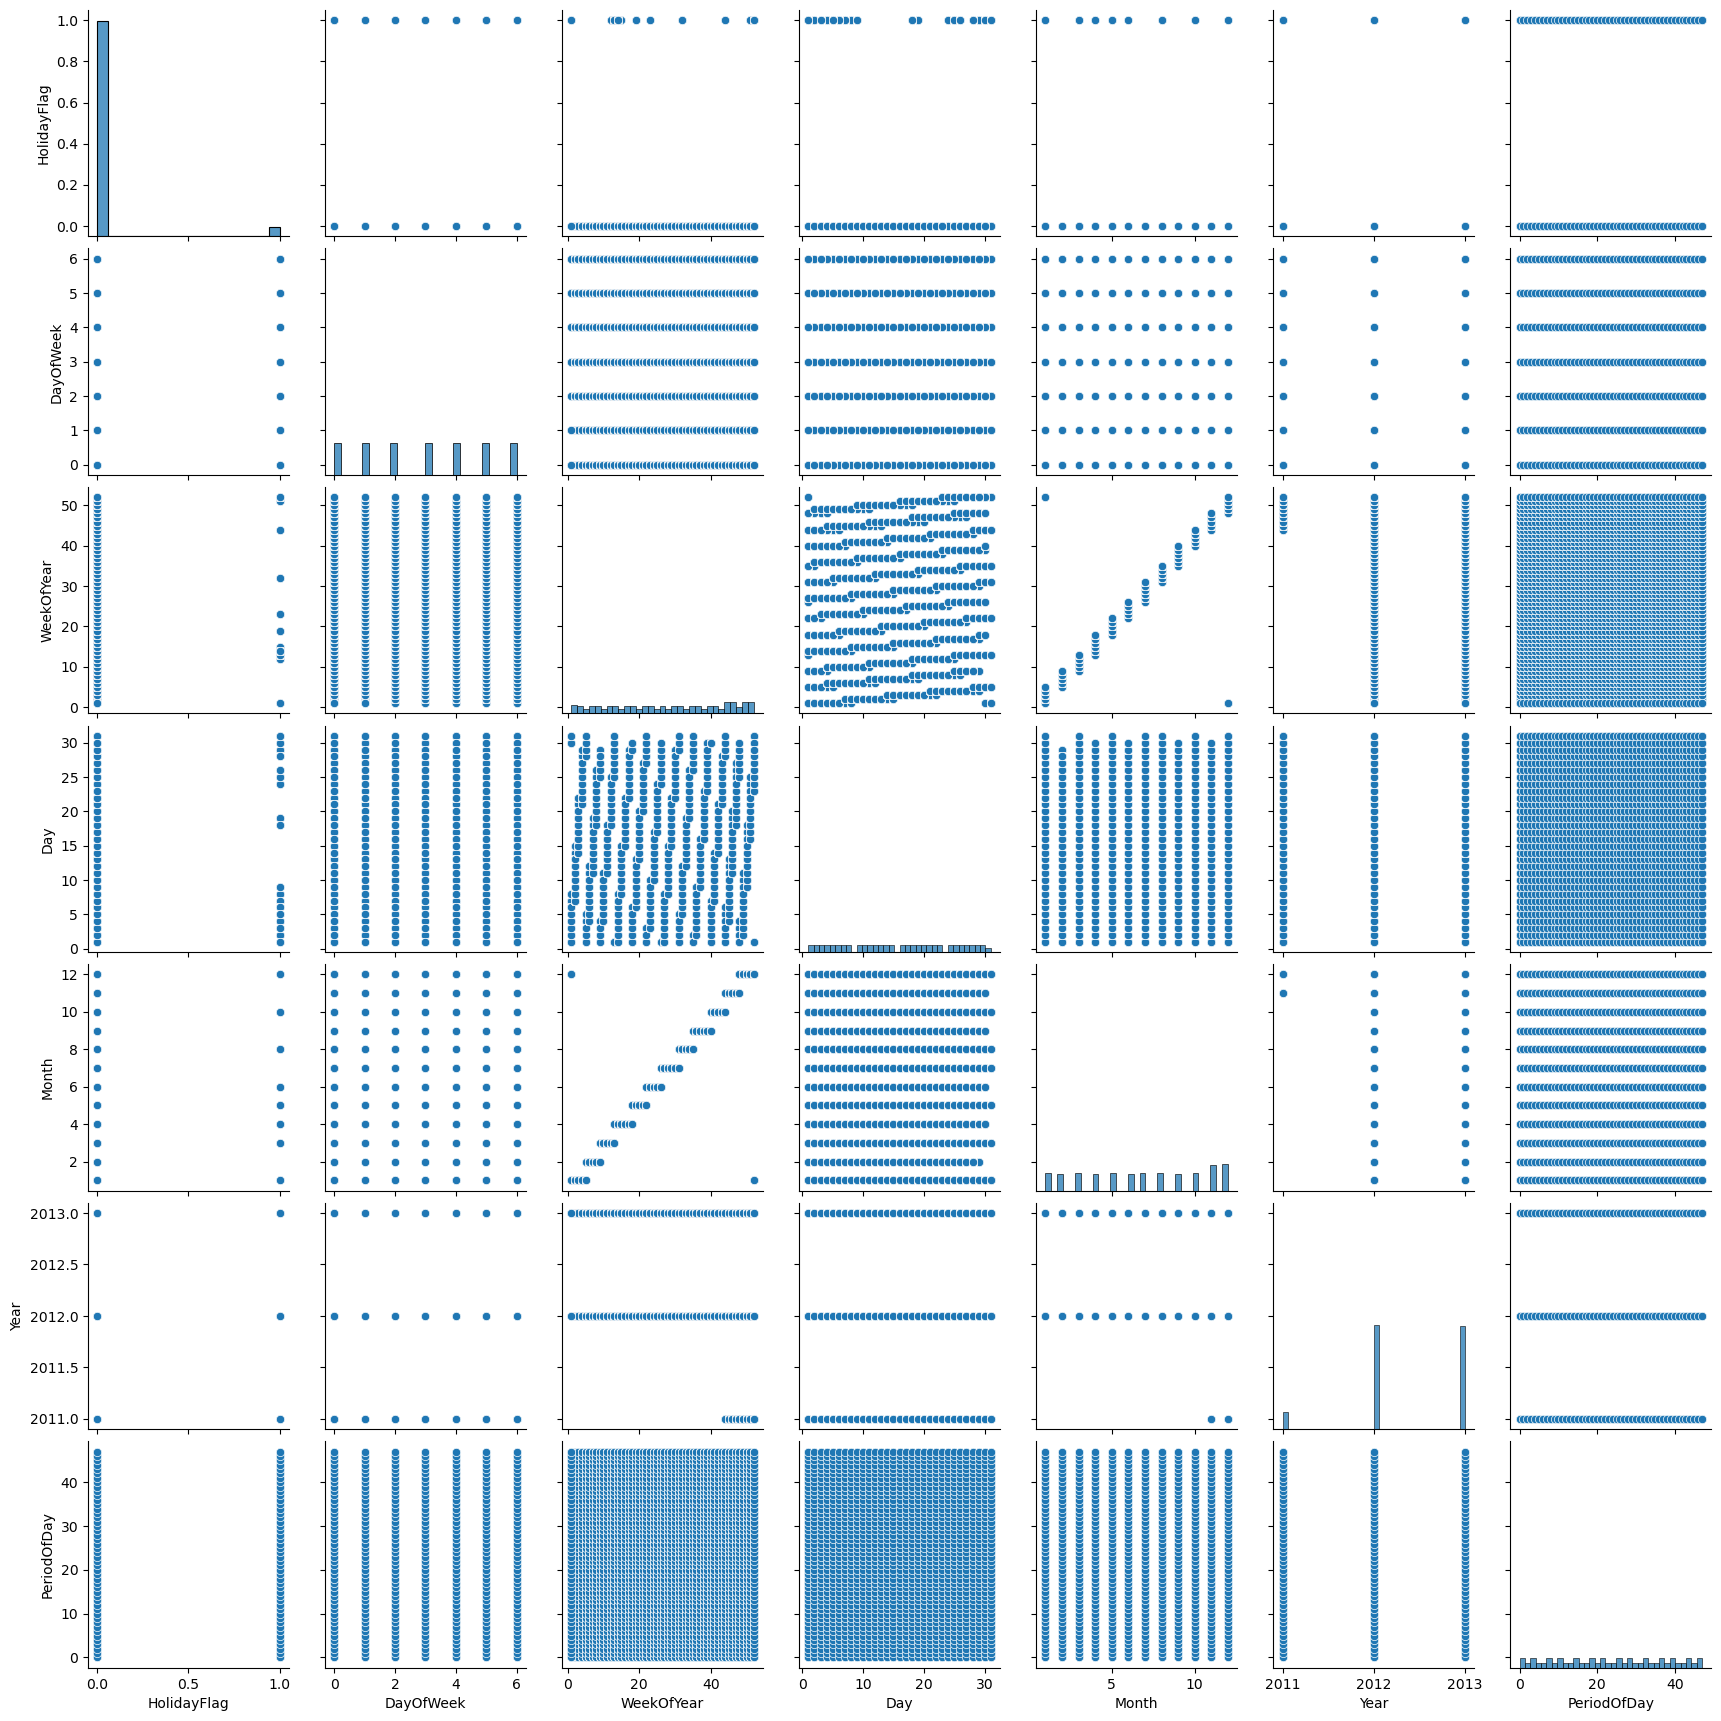

In [6]:
sns.pairplot(data)

In [ ]:
temp = testingdata.select_dtypes(include = ['number'])

In [24]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

ValueError: time data "13/11/2011 00:00" doesn't match format "%m/%d/%Y %H:%M", at position 576. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [26]:
temp = data.columns

In [35]:
for i in range(9, len(temp)):
    data[temp[i]] = data[temp[i]].astype(float)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                38014 non-null  object 
 1   Holiday                 1536 non-null   object 
 2   HolidayFlag             38014 non-null  int64  
 3   DayOfWeek               38014 non-null  int64  
 4   WeekOfYear              38014 non-null  int64  
 5   Day                     38014 non-null  int64  
 6   Month                   38014 non-null  int64  
 7   Year                    38014 non-null  int64  
 8   PeriodOfDay             38014 non-null  int64  
 9   ForecastWindProduction  38014 non-null  float64
 10  SystemLoadEA            38014 non-null  float64
 11  SMPEA                   38014 non-null  float64
 12  ORKTemperature          38014 non-null  float64
 13  ORKWindspeed            38014 non-null  float64
 14  CO2Intensity            38014 non-null

C:\Users\navee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


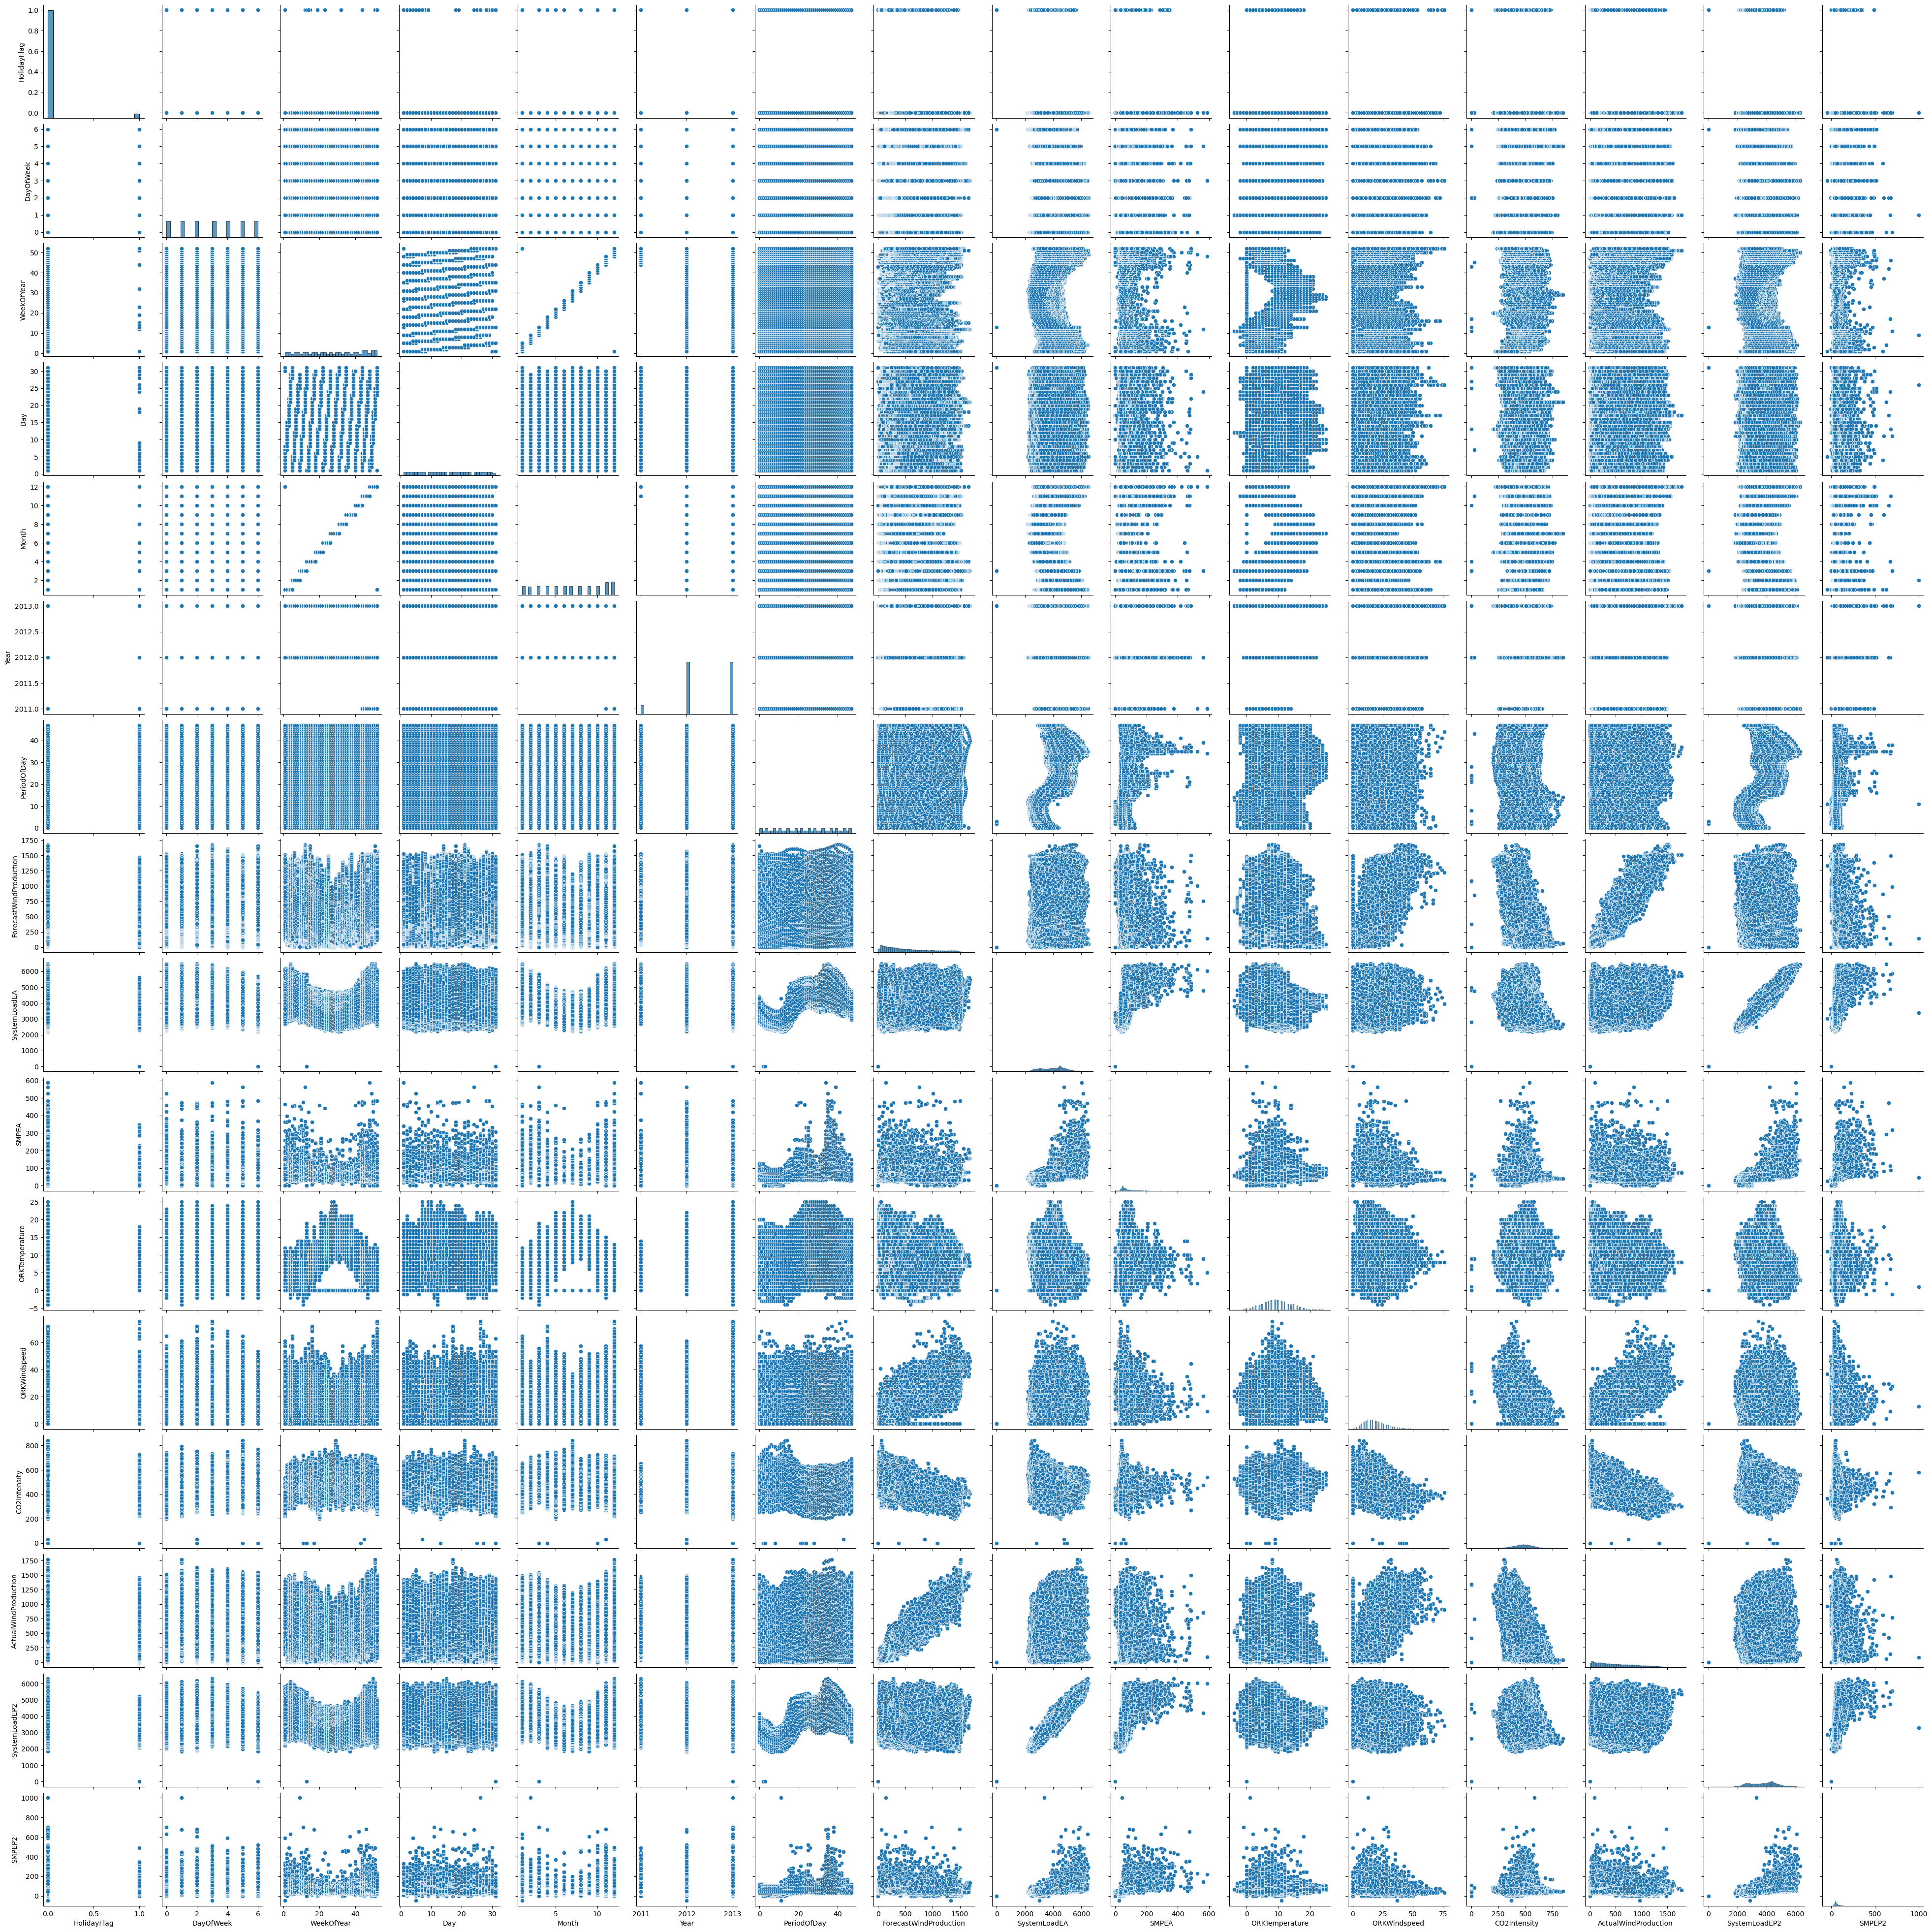

In [37]:
sns.pairplot(data)